In [ ]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fraudTest.csv to fraudTest.csv


In [ ]:
data =pd.read_csv(io.BytesIO(uploaded['fraudTest.csv']))
print(data)

        Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       frau

In [ ]:
from sklearn.preprocessing import LabelEncoder
object_cols = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
X = data.drop("is_fraud", axis=1)
y = data["is_fraud"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:",f1)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.9968269392259891
Precision: 0.5822222222222222
Recall: 0.6140625
F1-score: 0.5977186311787072
Confusion Matrix:
 [[165794    282]
 [   247    393]]


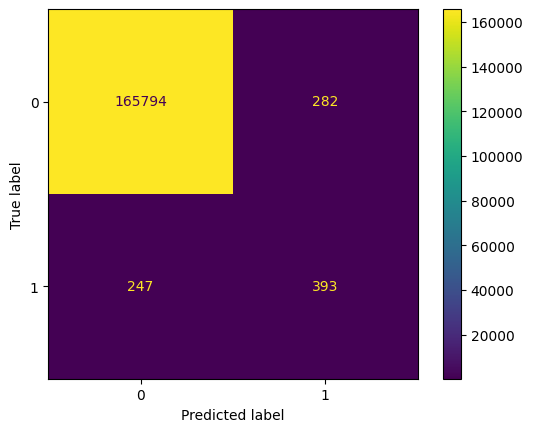

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
d=ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
d.plot()

[Text(0.7461248461910243, 0.9838709677419355, 'x[5] <= 714.145\ngini = 0.008\nsamples = 389003\nvalue = [387498, 1505]'),
 Text(0.5772913766699002, 0.9516129032258065, 'x[5] <= 272.16\ngini = 0.004\nsamples = 386732\nvalue = [385880, 852]'),
 Text(0.47779235947270593, 0.9193548387096774, 'x[12] <= 99852.0\ngini = 0.002\nsamples = 379420\nvalue = [378996, 424]'),
 Text(0.4765407460647973, 0.8870967741935484, 'x[5] <= 249.27\ngini = 0.002\nsamples = 379419\nvalue = [378996, 423]'),
 Text(0.34374132707307636, 0.8548387096774194, 'x[5] <= 24.065\ngini = 0.002\nsamples = 378201\nvalue = [377806, 395]'),
 Text(0.131083658370348, 0.8225806451612904, 'x[5] <= 16.995\ngini = 0.005\nsamples = 137326\nvalue = [137012, 314]'),
 Text(0.05836807724251476, 0.7903225806451613, 'x[4] <= 3.5\ngini = 0.003\nsamples = 120204\nvalue = [120034, 170]'),
 Text(0.008956858450346149, 0.7580645161290323, 'x[4] <= 1.5\ngini = 0.013\nsamples = 15756\nvalue = [15651, 105]'),
 Text(0.007705245042437517, 0.7258064516

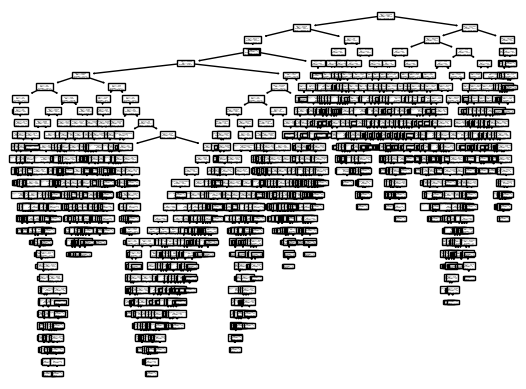

In [ ]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [ ]:
!pip install dtreeviz==1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66616 sha256=255bc622d7233cb711a2d7616a6e0a740065652fa50c37b4f03f956c662f729d
  Stored in directory: /root/.cache/pip/wheels/fb/66/3d/9cd847ff474e0f5acc7c01984f869262f9e39d16830d6e15da
Successfully built dtreeviz


In [ ]:
!pip install --upgrade graphviz==0.19.1
from dtreeviz.trees import *
viz = dtreeviz(clf,
               x_data=X_train,
               y_data=y_train,
               target_name='is_fraud',
               feature_names=X_train.columns
              )
viz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3


ImportError: cannot import name 'run' from 'graphviz.backend' (/usr/local/lib/python3.10/dist-packages/graphviz/backend/__init__.py)